In [1]:
# This pandas script examines high level trends in the San francisco Police Department (SFPD) Incident report.
# The study period covers 2010 through 2017.  Specific trends analyzed are:  
#       Top 10 categories of incidents, by count
#       Trend of the total annual count of incidents for each zip code, over the study period
#       Mix of the types of top 10 categories for each zip code, over the study period
#
# The code blocks below contain additional comments about details of each analysis.
#
# NOTE: only the first two graphs, top 10 categories, were  included in the group presentation.
# Other team members presented a variation of the other two analyses in their code, the results of which were included 
# in the group presentation.

# Key Observations and insights
* The general increase in the number of incidents for all of San Francisco is commensurate with the population increase during the study period.
* The make-up of categories of incidents for the city as a whole remains mostly unchanged during the study period.
	- A notable exception to this pattern is drug related incidents, which declined by nearly 80% during the study period.
	- This decline was accompanied by a nearly 50% increase in the incidents of theft.
* The two patterns described above were present in each of the zip codes in San Francisco.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
from datetime import datetime

In [3]:
# Load datafram from csv compressed in the zip file
#
data_zip_path = 'data/main-data.zip'
zf = zipfile.ZipFile(data_zip_path)
data = pd.read_csv(zf.open('main-data.csv'))
data.head()

,Unnamed: 0,id,year,month,day_m,day_w,time,category,meta_cat,resolution,location,lat,lng,zipcode
0,0,150060275,2015,1,19,Monday,14:00,NON-CRIMINAL,OI,NONE,"(37.7617007179518, -122.42158168137)",37.761701,-122.421582,94110
1,1,150098210,2015,2,1,Sunday,15:45,ROBBERY,BC,NONE,"(37.7841907151119, -122.414406029855)",37.784191,-122.414406,94109
2,2,150098210,2015,2,1,Sunday,15:45,ASSAULT,BC,NONE,"(37.7841907151119, -122.414406029855)",37.784191,-122.414406,94109
3,3,150098210,2015,2,1,Sunday,15:45,SECONDARY CODES,OI,NONE,"(37.7841907151119, -122.414406029855)",37.784191,-122.414406,94109
4,4,150098226,2015,1,27,Tuesday,19:00,VANDALISM,BC,NONE,"(37.8004687042875, -122.431118543788)",37.800469,-122.431119,94123


In [4]:
# The list below is used to exclude a number of zip codes that are actually outside SF
#
zipcodes = [94110, 94109, 94123, 94118, 94124, 94108, 94103, 94114, 94102,
       94122, 94133, 94131, 94107, 94115, 94112, 94134, 94116, 94121,
       94111, 94117, 94132, 94105, 94127, 94158]
subset_zip=data[data.zipcode.isin(zipcodes)]

In [5]:
# Exclude columns not needed by this script
#
main_df = subset_zip.drop(['day_w', 'time', 'location', 'zipcode', 
                        'lat', 'lng', 'resolution'], axis=1)
group_cat_y = main_df.groupby(['category', 'year'])
cat_year_df = group_cat_y["id"].size()
cat_year_df = cat_year_df.unstack()
cat_year_df= cat_year_df.fillna(0)
all_cats = cat_year_df.nlargest(38,2010)
top13 = cat_year_df.nlargest(13,2010)
top13

year,2010,2011,2012,2013,2014,2015,2016,2017
category,,,,,,,,
LARCENY/THEFT,24248.0,25724.0,30717.0,36130.0,37629.0,41672.0,40117.0,46572.0
OTHER OFFENSES,20893.0,19426.0,18507.0,19367.0,20625.0,20220.0,19554.0,17847.0
NON-CRIMINAL,13787.0,15483.0,16827.0,20923.0,19247.0,19020.0,17791.0,16833.0
ASSAULT,12316.0,12205.0,12084.0,12517.0,12312.0,13007.0,13510.0,13363.0
DRUG/NARCOTIC,9193.0,6934.0,6437.0,6760.0,5396.0,4238.0,4242.0,3245.0
VANDALISM,7883.0,7193.0,7755.0,6868.0,7105.0,7599.0,8526.0,9558.0
WARRANTS,6170.0,6300.0,6279.0,7337.0,6700.0,6771.0,5937.0,4882.0
SUSPICIOUS OCC,5966.0,6158.0,5811.0,5629.0,5182.0,5448.0,5755.0,5958.0
BURGLARY,4918.0,4942.0,6200.0,6145.0,5994.0,5873.0,5768.0,5673.0


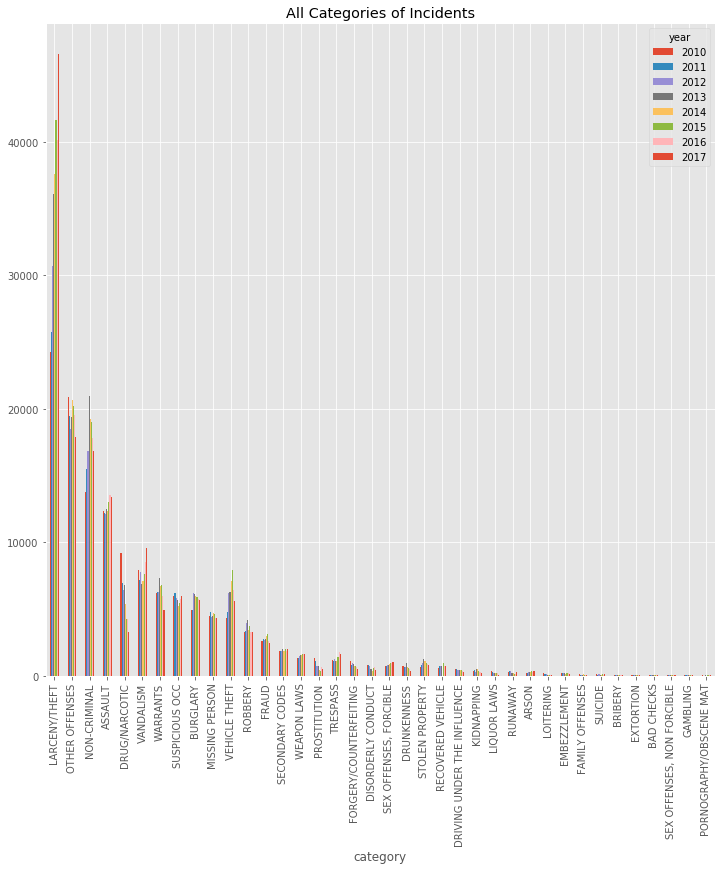

In [6]:
# This clode block produced a bar chart of all the categories included in the SFPD incident report.
# The purspose of this plot is to demonstrate that the top 13 categories represent the bulk of 
#    incidents, as measured by the count.
#
plt.style.use('ggplot')
all_cats.plot(kind='bar', figsize=(12,12), title='All Categories of Incidents')
plt.savefig('output/all_cats.png')
plt.show()

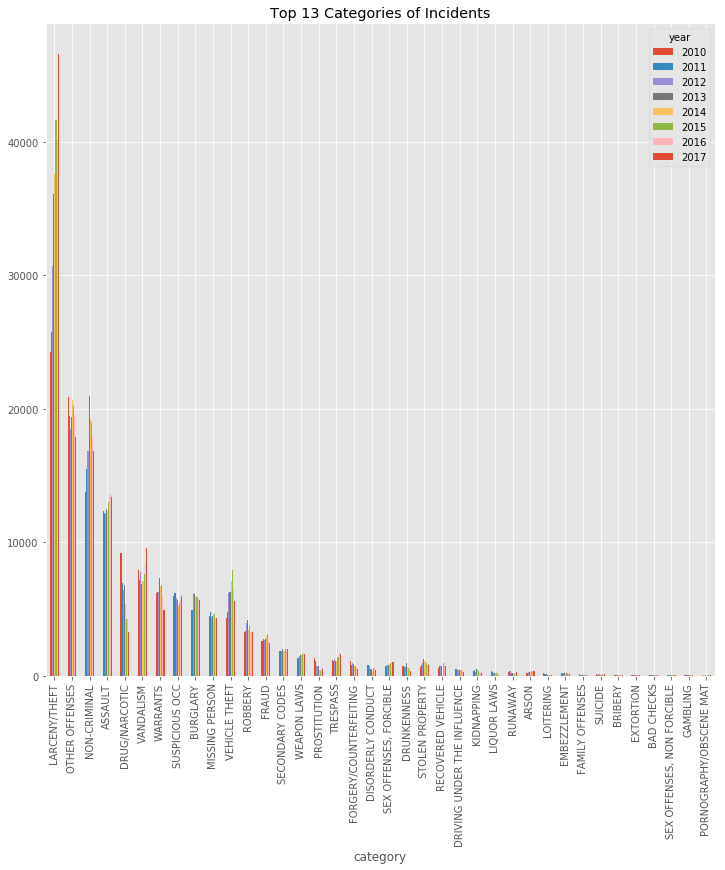

In [7]:
# This clode block produced a bar chart of the top 13 categories included in the SFPD incident report.
# The purspose of this plot is to demonstrate that two additional cateogires, "other" and "non-criminal", can also
#    be excluded from further analysis.
#
plt.style.use('ggplot')
all_cats.plot(kind='bar', figsize=(12,12), title='Top 13 Categories of Incidents')
plt.savefig('output/top13_cats.png')
plt.show()

In [8]:
# This code block produces a reduced dataframe which contains the top 11 categories of incidents, for more
#     efficient processing of additional analysis.
#
categories = ['LARCENY/THEFT', 'ASSAULT', 'VANDALISM', 'WARRANTS', 'VEHICLE THEFT', 'SUSPICIOUS OCC',
             'BURGLARY', 'DRUG/NARCOTIC', 'ROBBERY', 'FRAUD']
subset_df=subset_zip[subset_zip.category.isin(categories)]
data_filter_df = subset_df.filter(['year', 'category', 'meta_cat', 'zipcode'], axis=1)
data_filter_df.head()

,year,category,meta_cat,zipcode
1,2015,ROBBERY,BC,94109
2,2015,ASSAULT,BC,94109
4,2015,VANDALISM,BC,94123
7,2015,VANDALISM,BC,94124
8,2015,BURGLARY,BC,94108


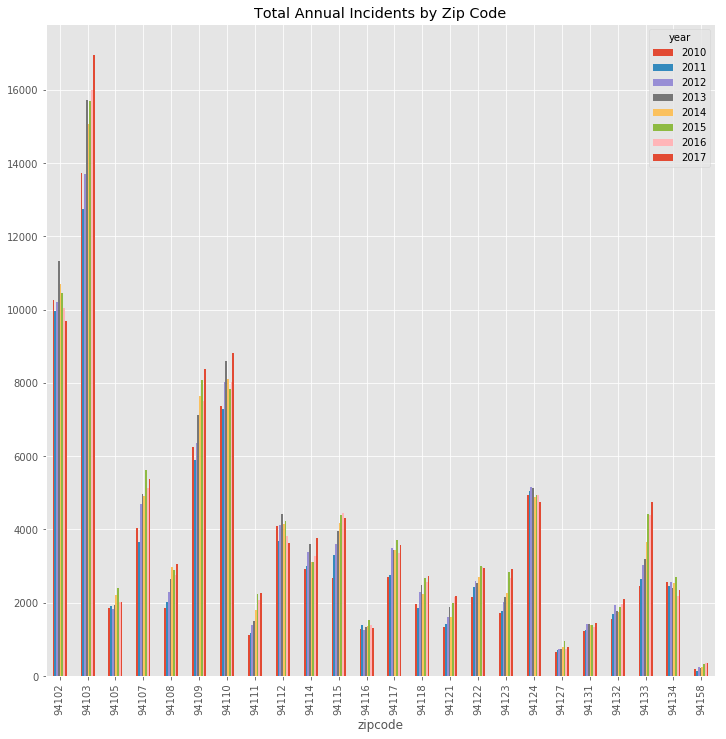

In [9]:
# This code block uses the dataframe produced in the previous block, to generate a bar chart of total annual incidnets for
#    all zip codes in SF.
# The basic approach is to make use of a multi-index groupby operation, and then unstack the results to obtain a
#    dataframe that can be plotted.
#
group_cat_y = data_filter_df.groupby(['zipcode', 'year'])
table_zc = group_cat_y.size().unstack()
plt.style.use('ggplot')
table_zc.plot(kind='bar', figsize=(12,12), title='Total Annual Incidents by Zip Code')
plt.savefig('output/zipcode_totals.png')
plt.show()

C:\Users\Leontiev\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


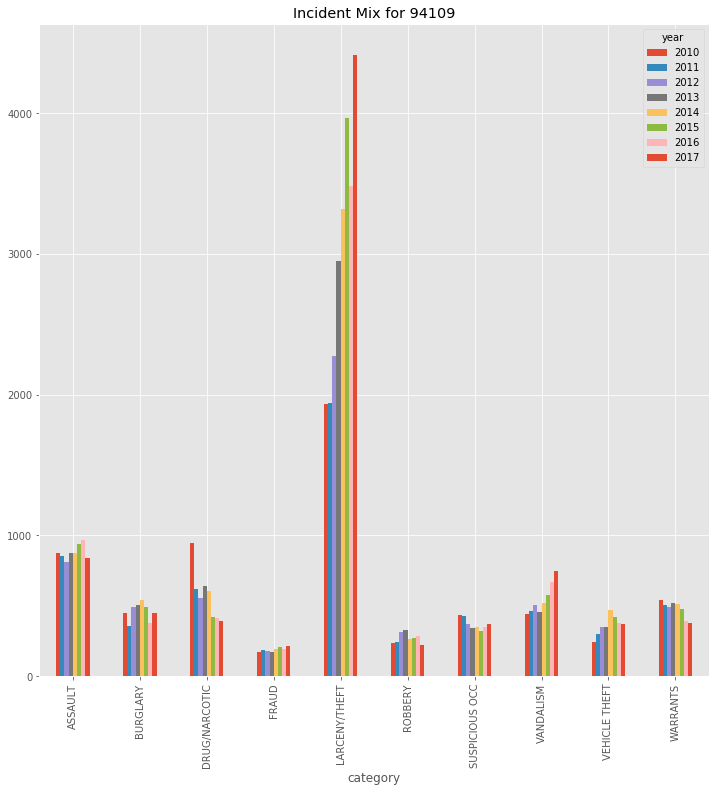

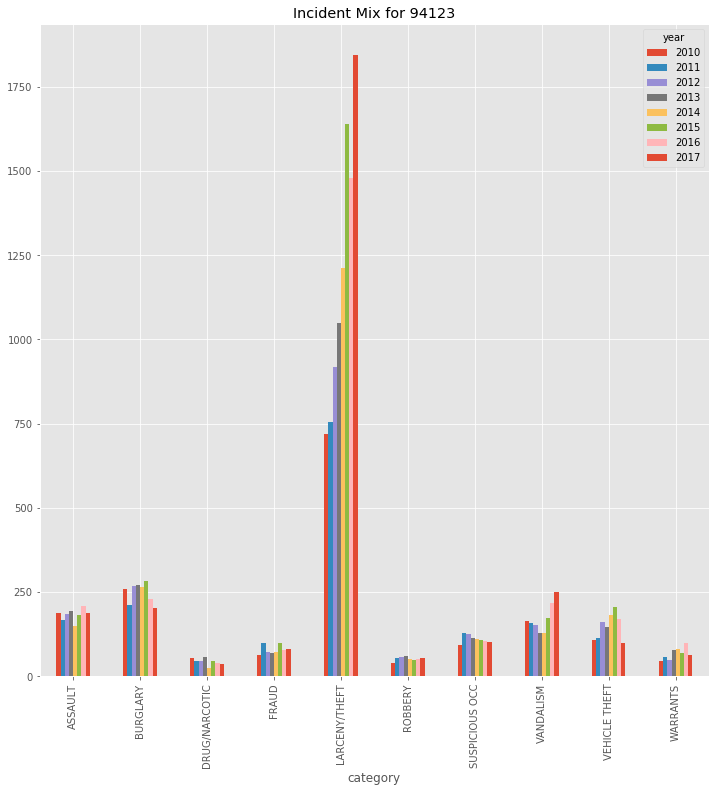

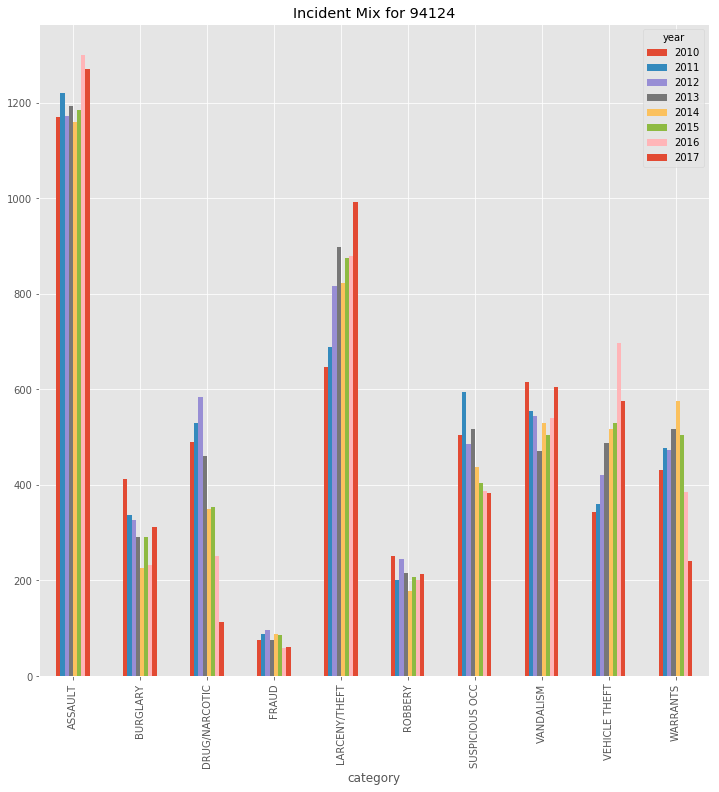

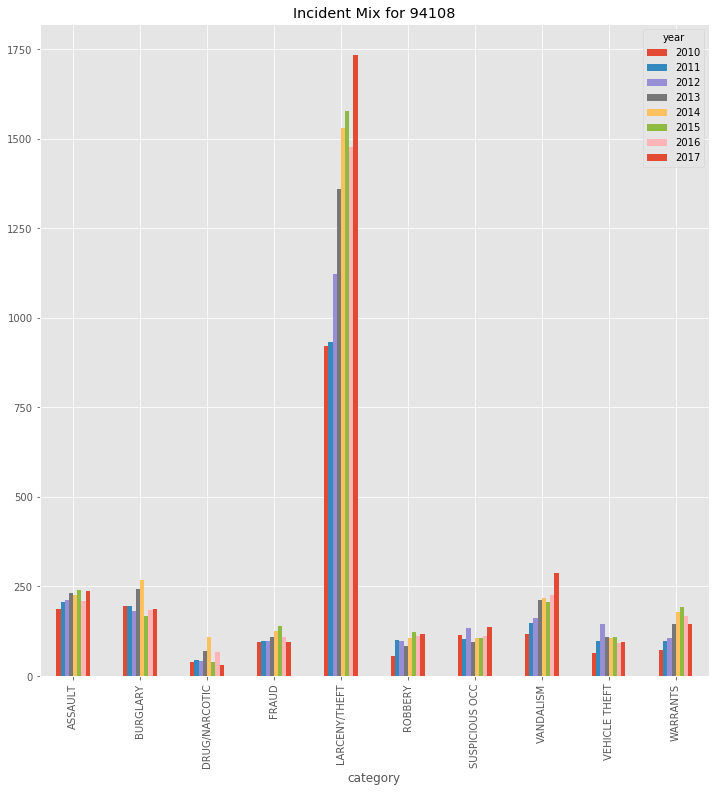

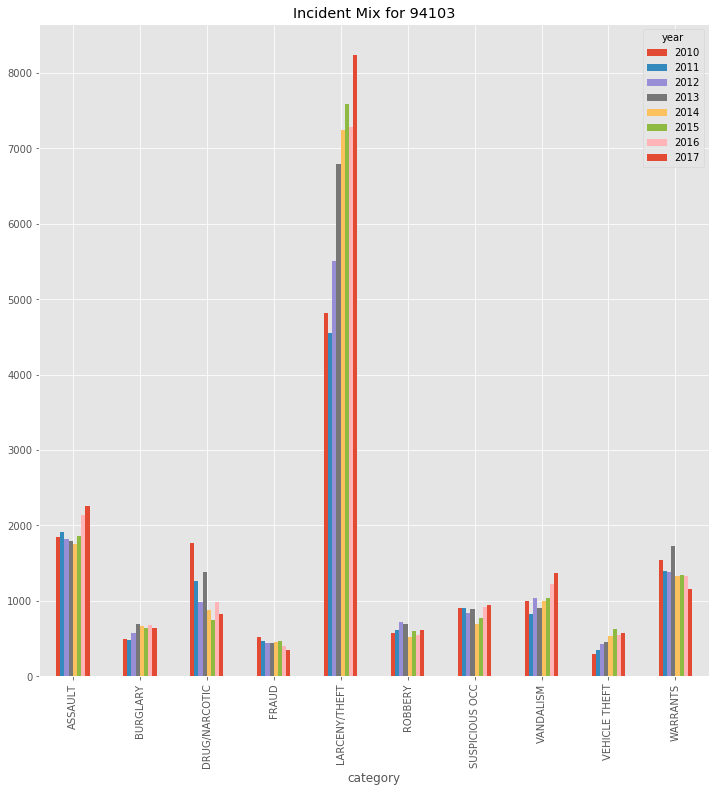

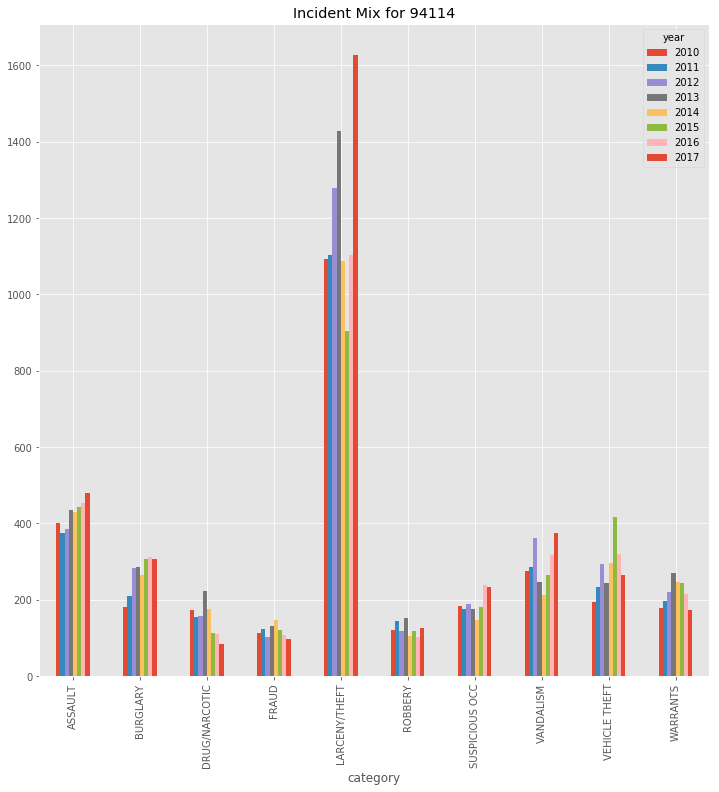

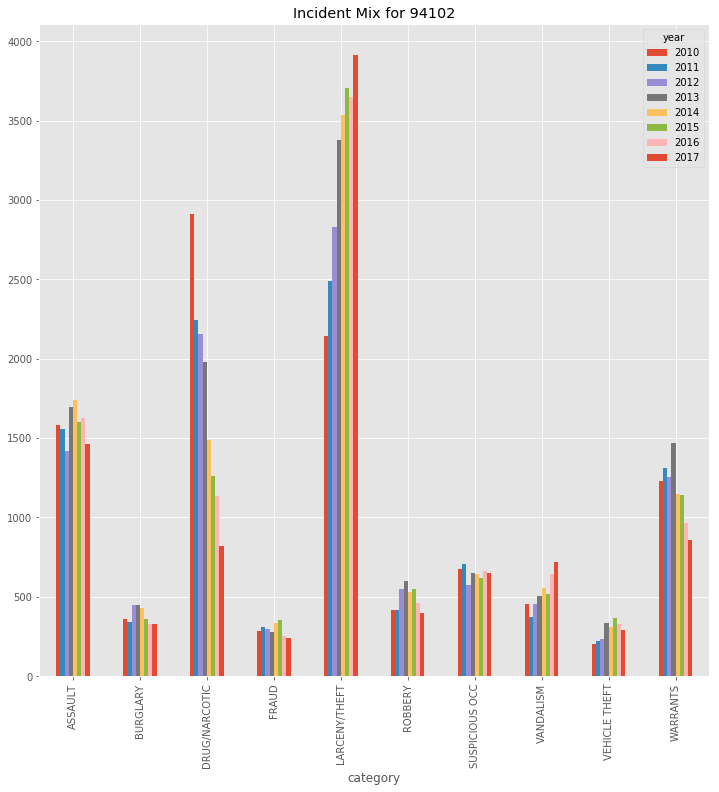

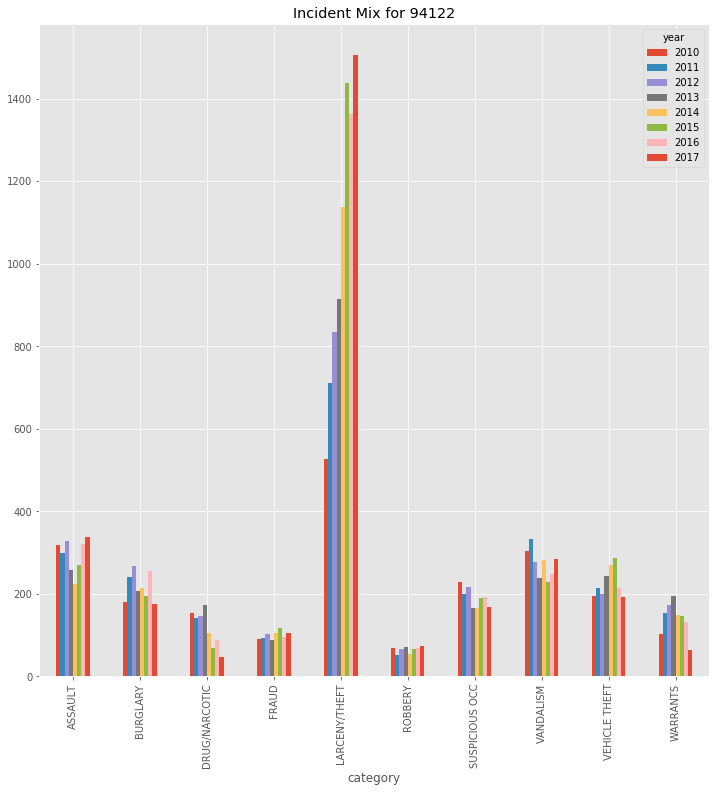

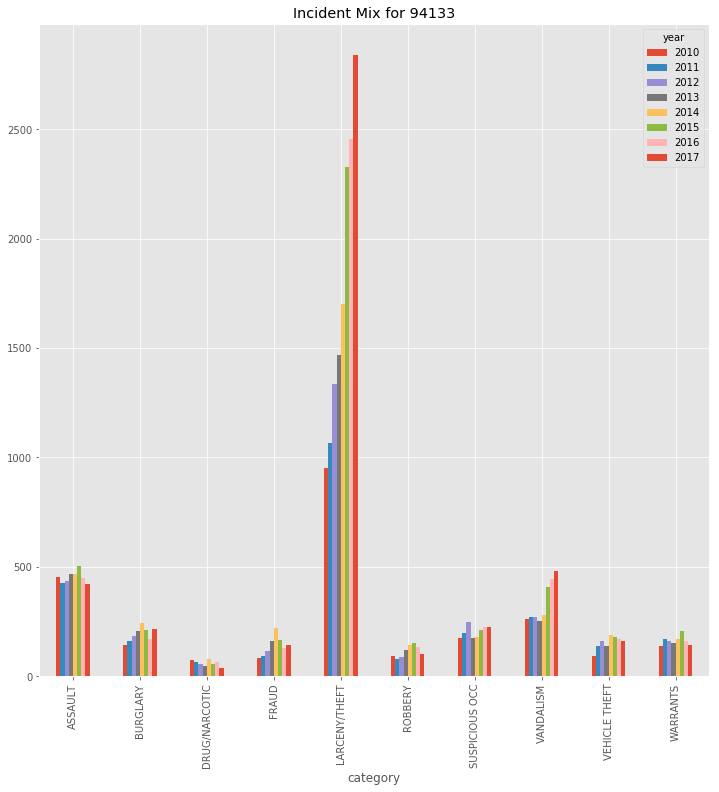

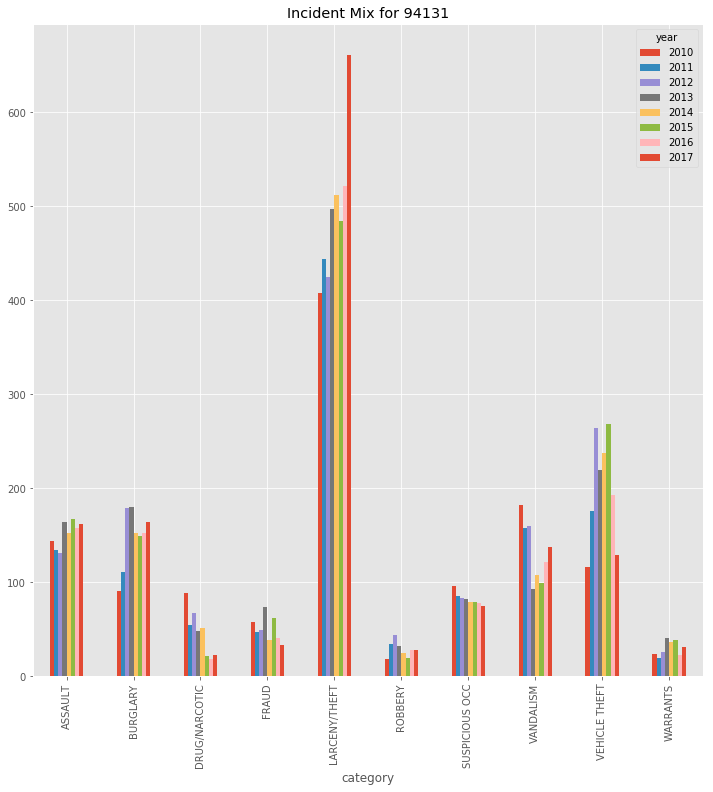

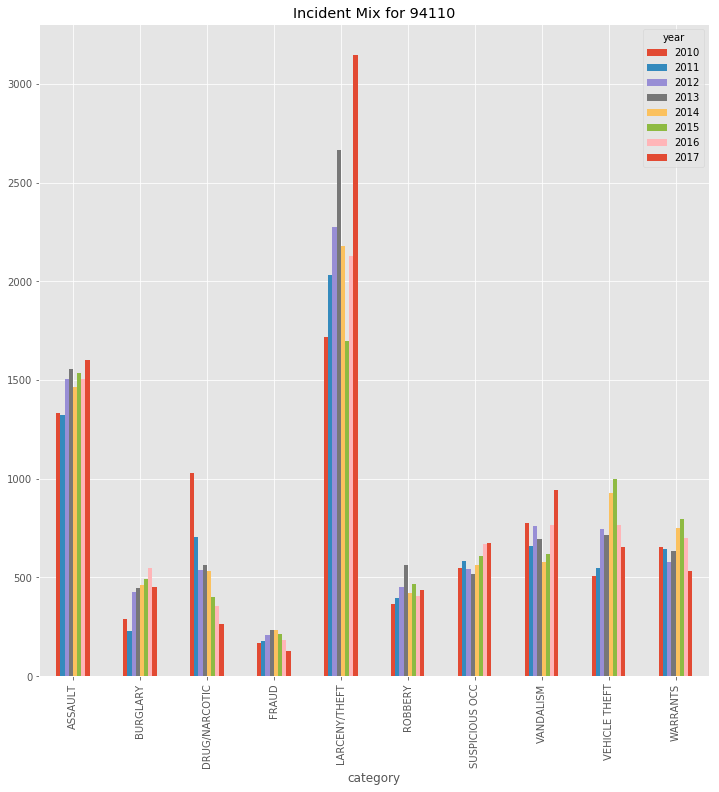

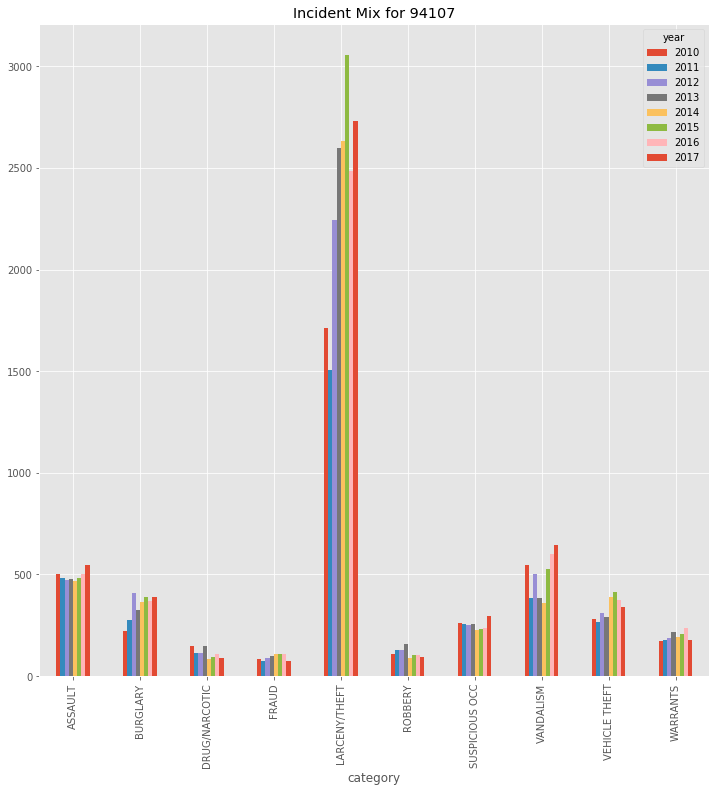

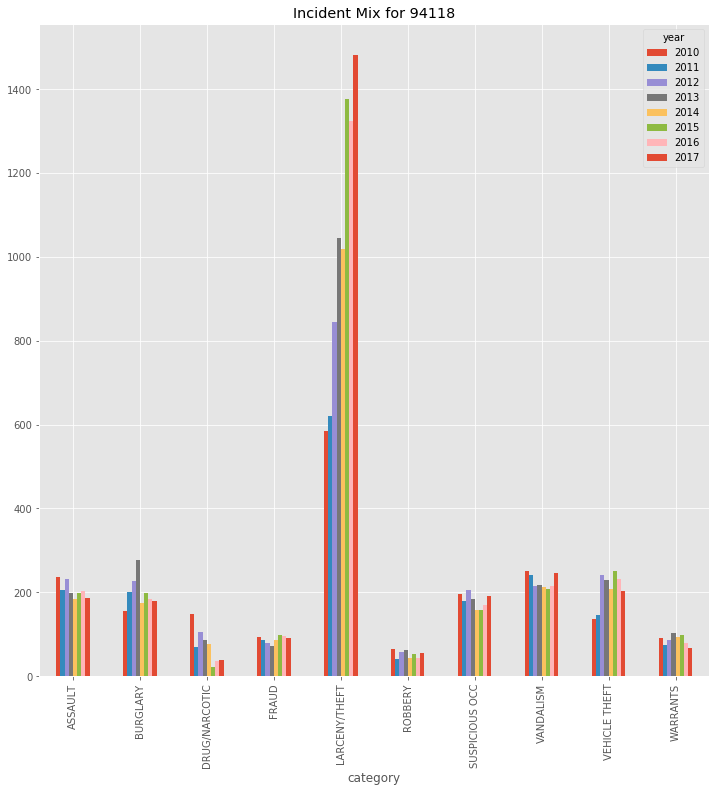

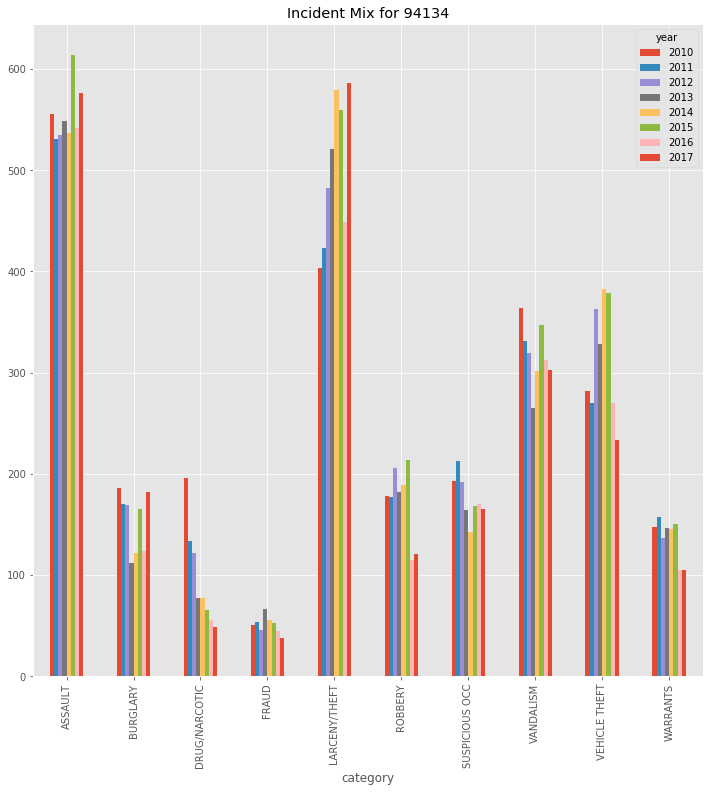

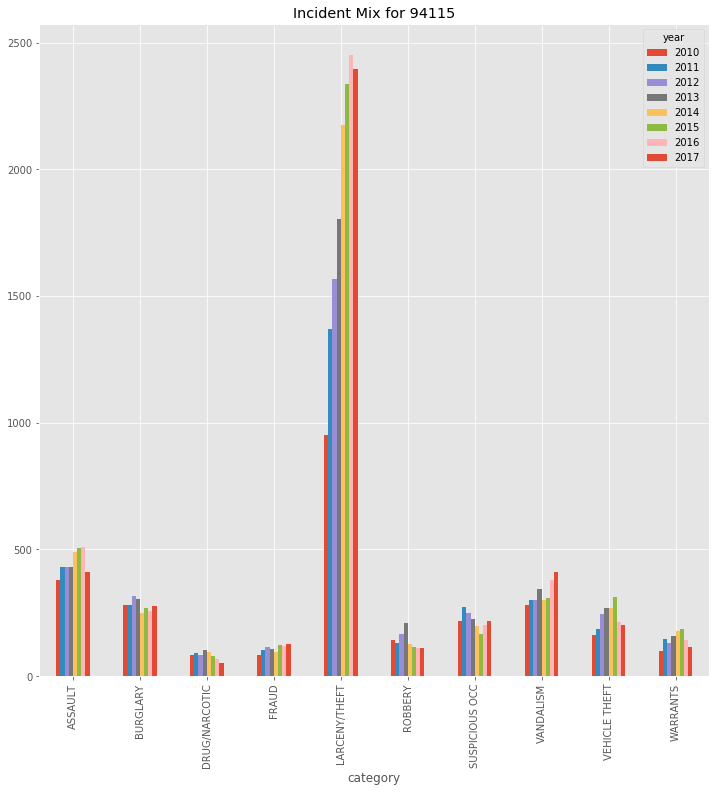

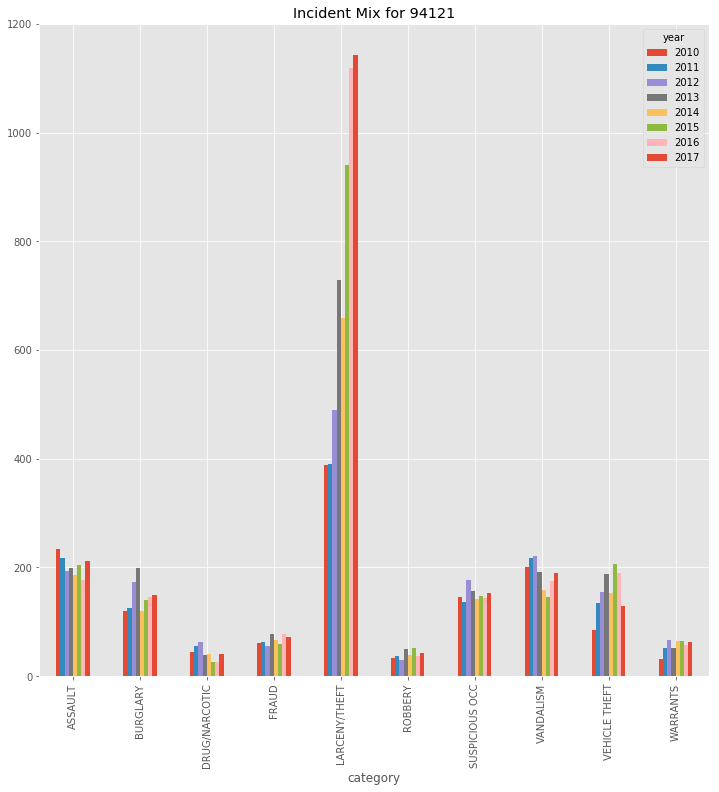

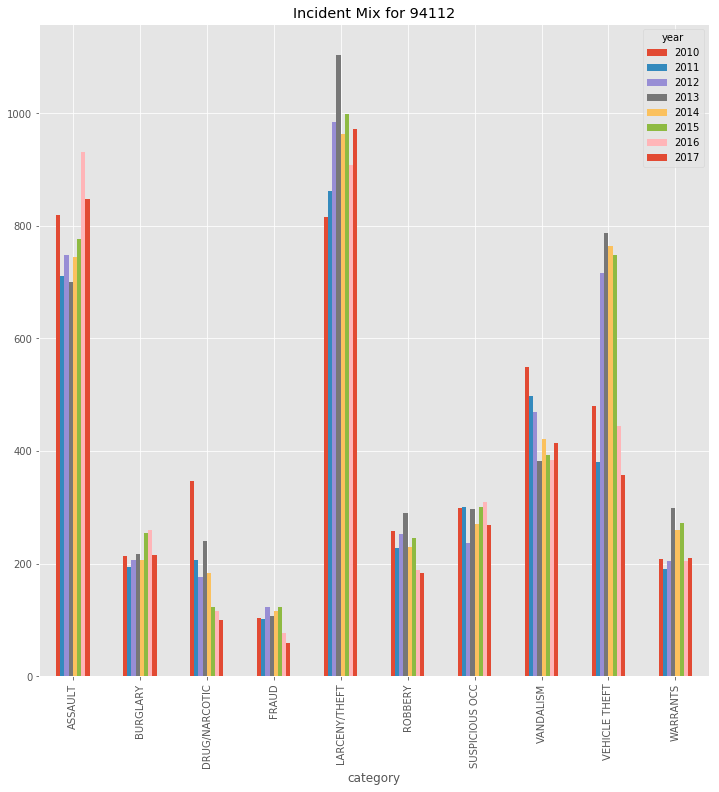

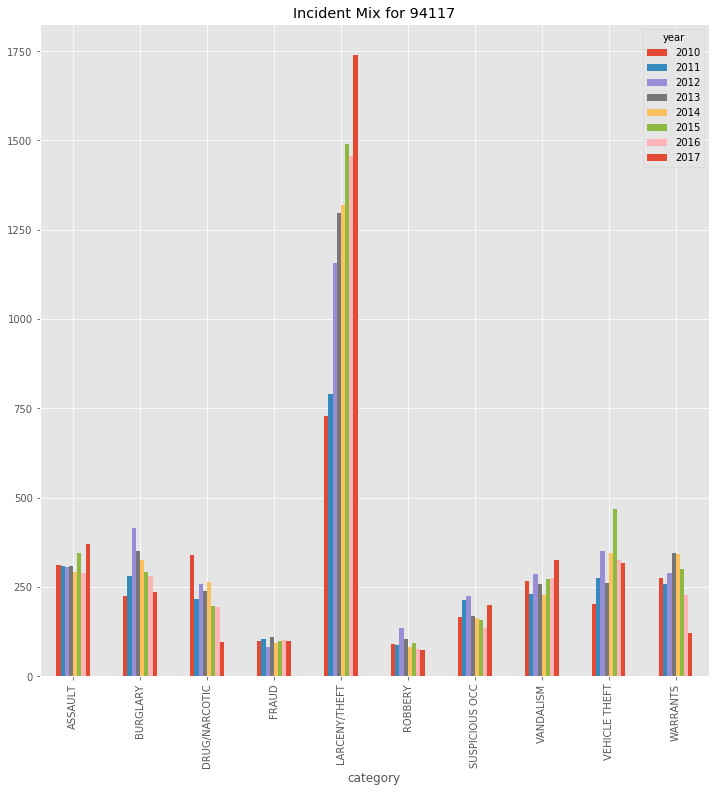

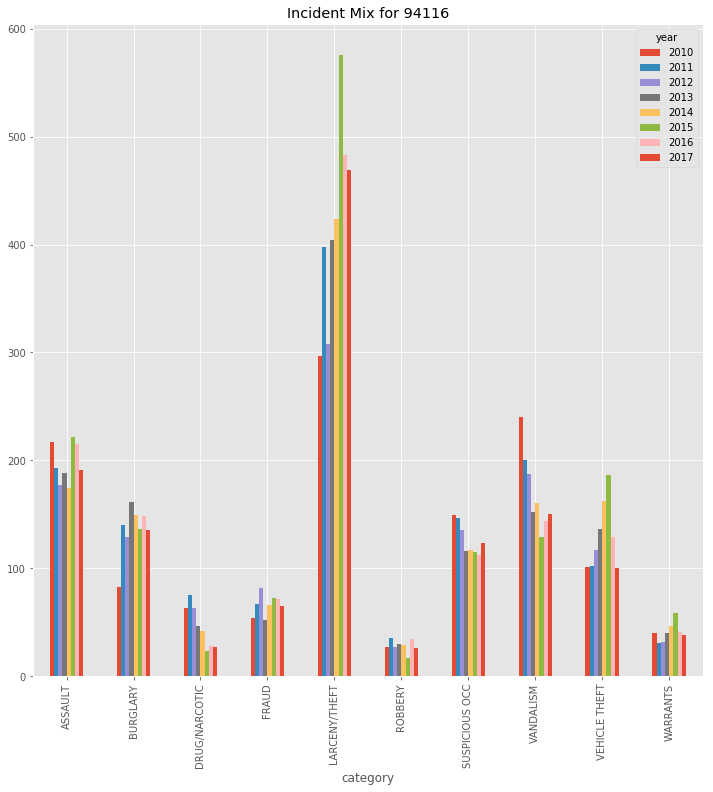

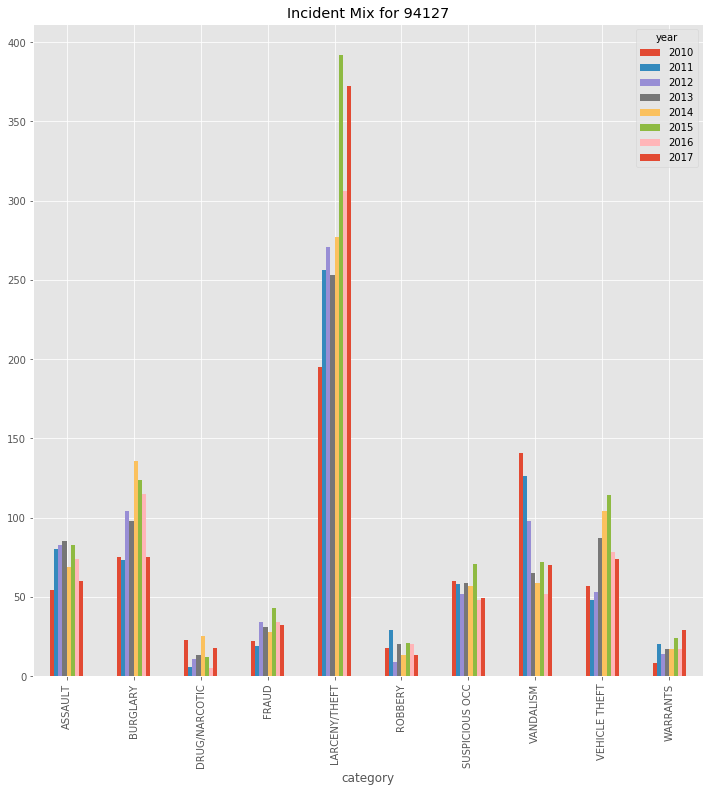

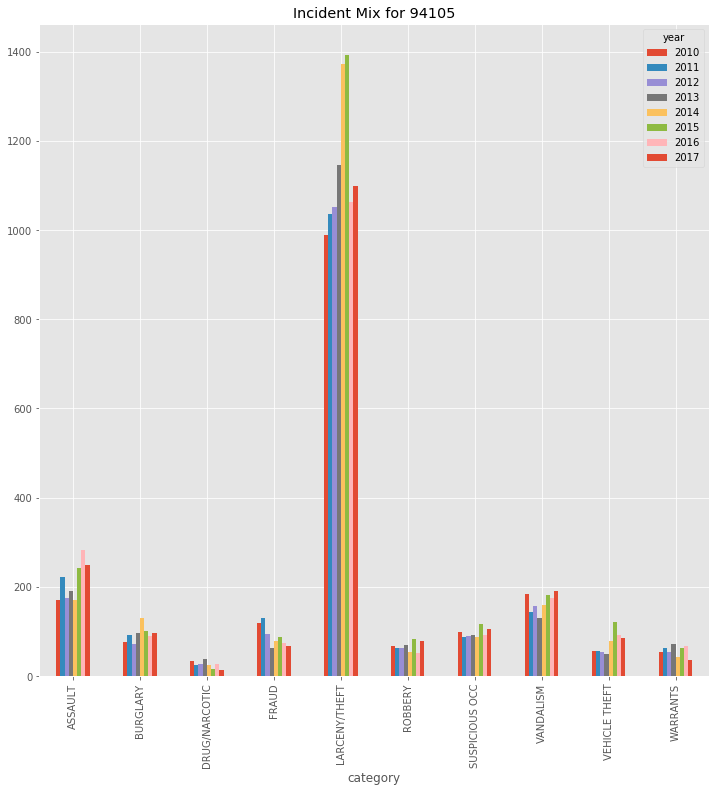

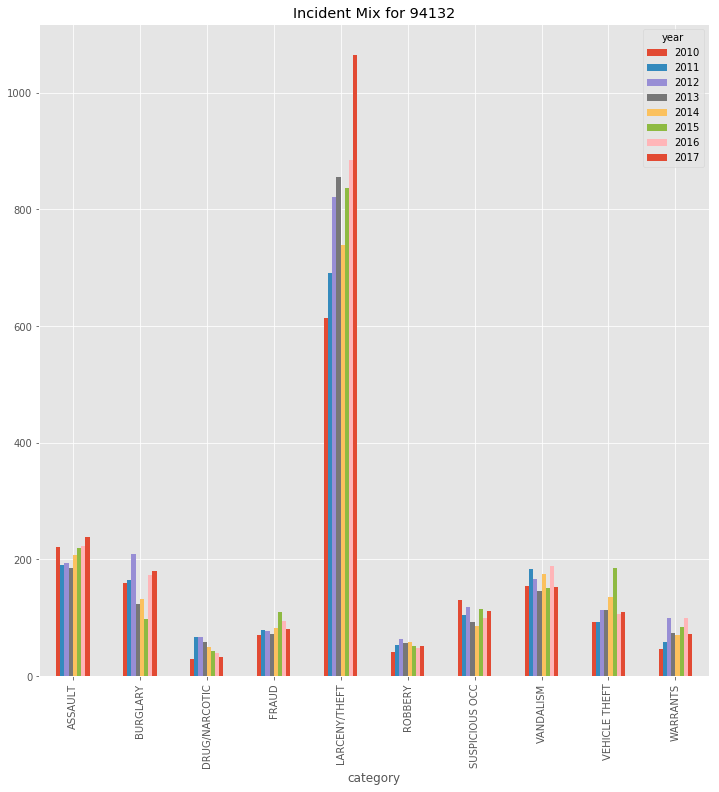

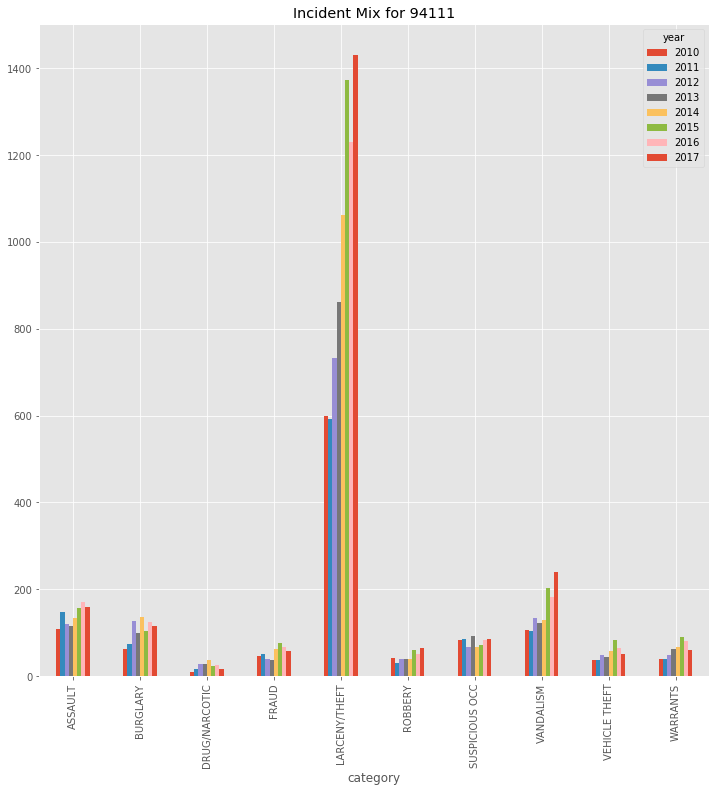

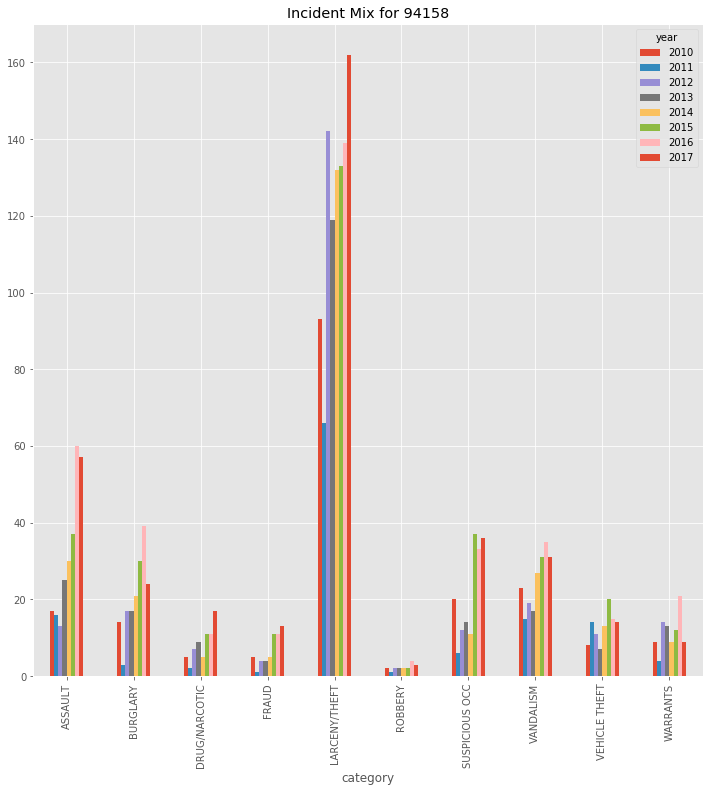

In [10]:
# This code block performs a similar task to the one above, to produce a bar chart of incident mix for all zip codes in SF.
#
# The basic approach is to make use of a multi-index groupby operation, and then unstack the results to obtain a
#    dataframe that can be plotted.
#
temp_grp = data_filter_df.groupby(['zipcode','category','year'])
zip_cat_grp = temp_grp.size().unstack()
zip_cat_grp.T
for zc in (data_filter_df['zipcode'].unique()):
    plt.style.use('ggplot')
    plot_title = 'Incident Mix for ' + str(zc)
    plt_file = 'output/incident_mix_' + str(zc) + '.png'
    zip_cat_grp.xs(int(zc)).plot(kind='bar', title=plot_title, figsize=(12,12))
    plt.savefig(plt_file)
plt.show()